Homework 3: Implementation of a classifier perceptron for binary classification

Diego Delgado Dragustinovis 

583980

### 1. Import standard libraries

In [30]:
# Importa la función para obtener conjuntos de datos del repositorio UCI Machine Learning
%pip install ucimlrepo


from ucimlrepo import fetch_ucirepo
# Importa la biblioteca pandas para el manejo y análisis de estructuras de datos
import pandas as pd
# Importa plotly.express para crear visualizaciones interactivas
import plotly.express as px
# Importa seaborn para la visualización de datos (con un enfoque estadístico)
import seaborn as sns
# Importa matplotlib.pyplot para generar gráficos estáticos
import matplotlib.pyplot as plt
# Importa numpy para operaciones matemáticas y manipulación de matrices
import numpy as np
# Importa TensorFlow para construir y entrenar redes neuronales
import tensorflow as tf
# Importa train_test_split para dividir el conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
# Importa StandardScaler para escalar las características (normalización)
from sklearn.preprocessing import StandardScaler
# Importa ConfusionMatrixDisplay para visualizar matrices de confusión
from sklearn.metrics import ConfusionMatrixDisplay


Note: you may need to restart the kernel to use updated packages.



Despliega la confirmación de las descargas e importes de funciones.

### 2. Download the ```occupancy-detection``` dataset

For further information regarding this dataset, visit the UC Irving Machine Learning Repository [here](https://archive.ics.uci.edu/dataset/357/occupancy+detection).

In [31]:
# Descargar el dataset `occupancy-detection` usando el id=357
occupancy_detection = fetch_ucirepo(id=357)

# Build the feature and the target data sets
data = occupancy_detection.data.original

### 3. Perform an exploratory data analysis

In [32]:
# Elimina las columnas 'date' e 'id' del dataframe, ya que no se necesitan para el análisis.
df = data.drop(['date', 'id'], axis=1)
# Convierte todas las columnas del dataframe a valores numéricos, y convierte los valores no numéricos a nulos.
df[df.columns] = df[df.columns].apply(pd.to_numeric, errors='coerce')
# Elimina las filas con valores nulos.
df = df.dropna()

#### 3a. Print some samples of the ```features``` and the ```target``` variables

In [33]:
# Muestra el contenido del dataframe.
df

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.180,27.2720,426.00,721.25,0.004793,1.0
1,23.150,27.2675,429.50,714.00,0.004783,1.0
2,23.150,27.2450,426.00,713.50,0.004779,1.0
3,23.150,27.2000,426.00,708.25,0.004772,1.0
4,23.100,27.2000,426.00,704.50,0.004757,1.0
...,...,...,...,...,...,...
20557,20.815,27.7175,429.75,1505.25,0.004213,1.0
20558,20.865,27.7450,423.50,1514.50,0.004230,1.0
20559,20.890,27.7450,423.50,1521.50,0.004237,1.0
20560,20.890,28.0225,418.75,1632.00,0.004279,1.0


Se despliega el dataframe.

#### 3b. Obtain statistics about the ```features``` and the ```target``` variables

In [34]:
# Genera una descripción estadística del dataframe 'df'.
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


Se despliega información sobre las variables del data frame incluyendo cantidad de datos, promedio, desviación estándar, mínimo, primer cuartil, segundo cuartil, tercer cuartil y máximo.

#### 3c. Visualise a scatter matrix plot using ```plotly``` to visualise the relationships between features

In [35]:
# Se seleccionan las columnas que no son "Occupancy" para usarlas como características en el gráfico
features = df.drop(["Occupancy"], axis=1).columns
# Se crea una matriz de gráficos de dispersión (scatter plot matrix) usando Plotly Express
fig = px.scatter_matrix(data_frame=df,
                        dimensions=features,
                        color=df['Occupancy'])
# Se actualizan los marcadores del gráfico, cambiando el tamaño y ocultando la diagonal y la mitad superior
fig.update_traces(marker = dict(size=4), diagonal_visible=False, showupperhalf=False)
# Se ajusta el diseño del gráfico, definiendo el ancho, alto, título y tamaño de fuente
fig.update_layout(width=900, height=600, title="Occupancy Detection", font_size=9)
# Se muestra el gráfico
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Este código genera una matriz de gráficos de dispersión o scatter plot matrix. Cada gráfico de dispersión muestra la relación entre dos características distintas del conjunto de datos, mientras que el color de los puntos representa el valor de la columna "Occupancy" (que parece ser una variable categórica, posiblemente indicando si un espacio está ocupado o no).

#### 3d. Visualise a pair plot to using ```seaborn``` to capture the relatioshops between features

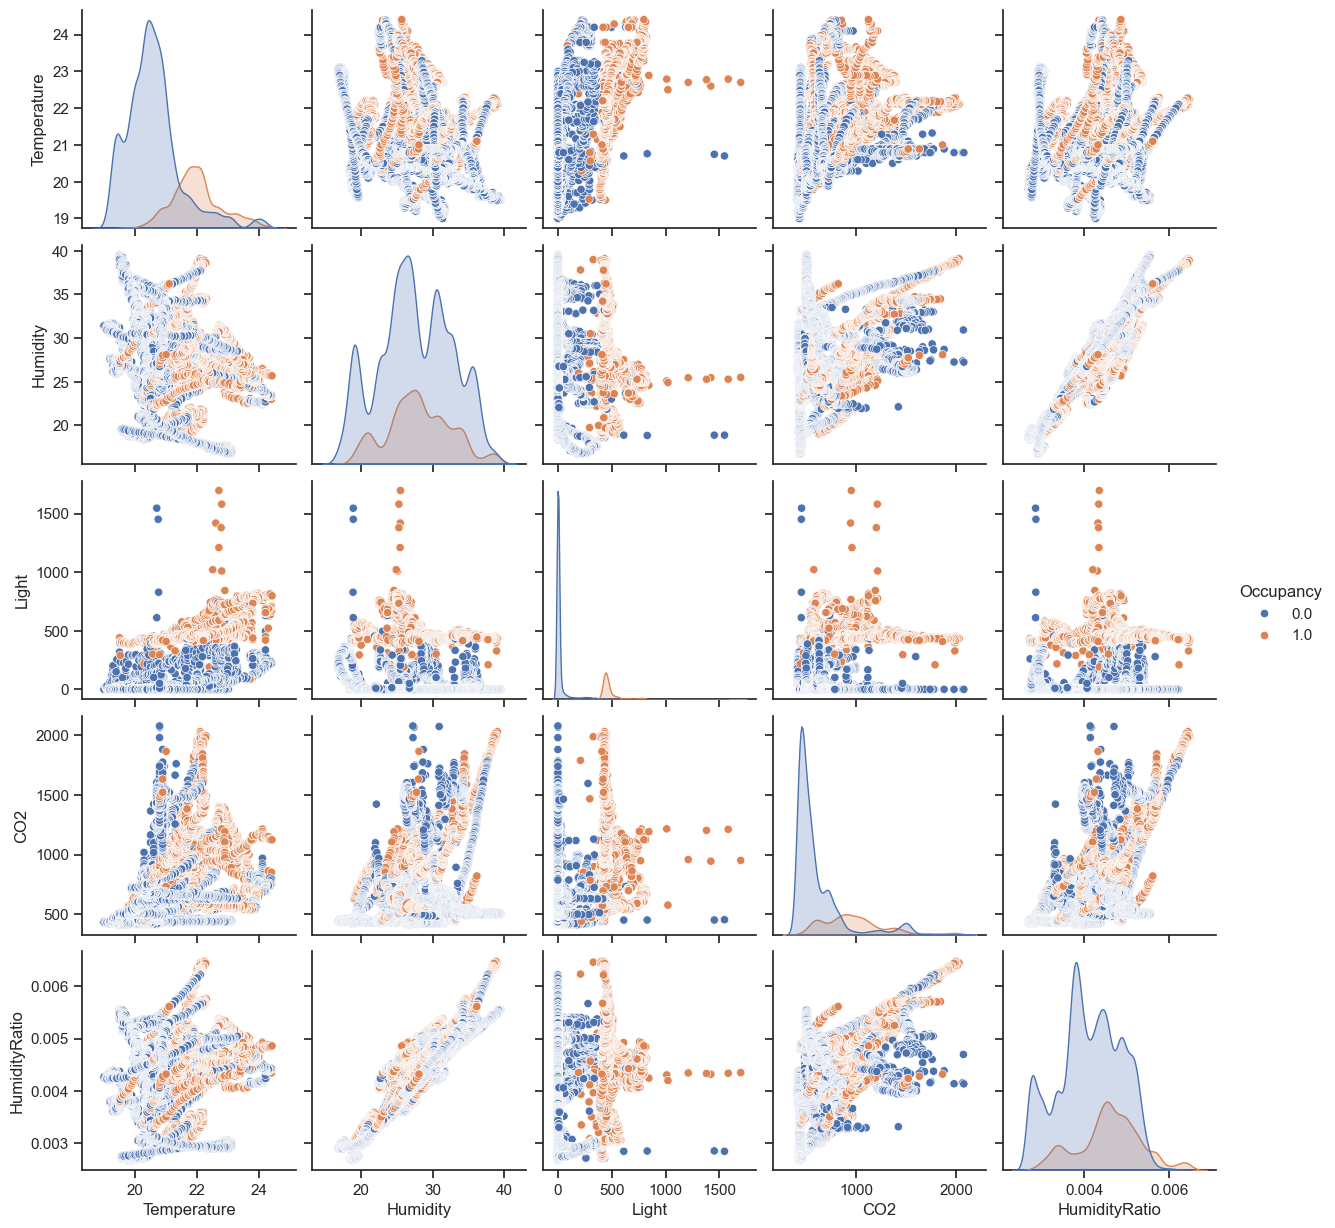

In [36]:
# Configura el tema de Seaborn para mejorar la apariencia de los gráficos, usando el estilo "ticks"
sns.set_theme(style="ticks")
# Crea un gráfico de pares (pairplot) de Seaborn para visualizar la relación entre las diferentes variables del DataFrame
sns.pairplot(df, hue="Occupancy");

Este código genera un pairplot (gráfico de pares) usando Seaborn. Este gráfico muestra:

Distribuciones univariadas en la diagonal principal (histogramas o KDEs).
Gráficos de dispersión (scatter plots) para las combinaciones de dos características fuera de la diagonal.
Los puntos en los gráficos se colorean según la columna "Occupancy", permitiendo ver cómo se agrupan los datos en función de esa variable.

#### 3e. Visualise the histogram of classes

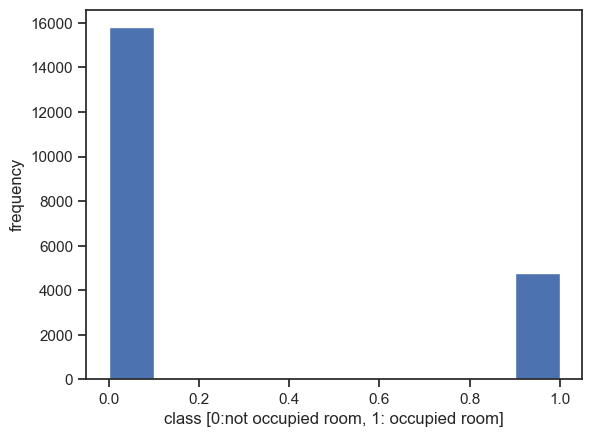

In [37]:
# Crea un histograma de la columna "Occupancy" del DataFrame para visualizar la distribución de esta variable
plt.hist(df['Occupancy']);
# Añade una etiqueta al eje x para indicar las clases: 0 para una habitación no ocupada y 1 para una habitación ocupada
plt.xlabel('class [0:not occupied room, 1: occupied room]')
# Añade una etiqueta al eje y para mostrar la frecuencia de cada clase en el histograma
plt.ylabel('frequency');

Este código genera un histograma que muestra la distribución de la variable "Occupancy"

### 4. Training and evaluate your model

#### 4a. For reproducibility purposes only, set a particular seed number

In [38]:
# Genera valores con una semilla para las operaciones aleatorias en TensorFlow.
tf.random.set_seed(4500)

#### 4b. Build your feature and target sets

In [39]:
# Crea el conjunto 'X' eliminando la variable objetivo: "Occupancy".
X = df.drop(["Occupancy"], axis=1)
# Crea el conjunto 'y' guarando los valores de la variable objetivo.
y = df['Occupancy']

#### 4c. Split your original data set into the training and testing sets

In [40]:
# Separa en datos de entrenamiento con una proporción del entreno de 0.2.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

#### 4d. Apply feature scaling and transform the training and testing sets

In [41]:
# Crea una instancia de 'StandardScaler', que se utiliza para estandarizar las características del conjunto de datos.
scaler = StandardScaler()
# Ajusta el escalador en los datos de entrenamiento y transforma estos datos para que tengan media 0 y desviación estándar 1.
X_train = scaler.fit_transform(X_train)
# Aplica la misma transformación a los datos de prueba, utilizando los parámetros calculados del conjunto de entrenamiento (media y desviación estándar).
X_test = scaler.transform(X_test)

#### 4e. Design your model architecture

In [42]:
# Definición de una función que crea y devuelve un modelo de red neuronal.
def get_model():
    # Se crea un modelo secuencial de Keras, que permite apilar capas de manera lineal.
    model = tf.keras.Sequential([
        # Se agrega una capa de entrada que espera una entrada con 5 características (shape=(5,)).
        tf.keras.layers.InputLayer(shape=(5,)),
        # Se agrega una capa densa con una sola neurona de salida y la activación 'sigmoid'.
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    # Regresa el modelo.
    return model

#### 4f. Print the summary of your model parameters

In [43]:
# Se crea el modelo llamando a la función get_model(), que devuelve un modelo secuencial de Keras
model = get_model()
# Se imprime un resumen del modelo, mostrando información sobre cada capa, su tipo, forma de salida y el número de parámetros
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

El método model.summary() muestra un resumen del modelo en la consola. Incluyendo el número total de parametros entrenables.

#### 4g. Configure the optimiser, loss function and metrics for training purposes

In [44]:
# Compila el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
# Evalúa el modelo en los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
# Imprime la precisión
print(f"Test Accuracy: {accuracy:.4f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.5990 - loss: 0.6884
Test Accuracy: 0.5948


Se muestra el resultado de la precisión del modelo. 

#### 4h. Fit your model to the training data set (training), using a 20% of it for validation purposes

In [46]:
# Entrena el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.20)

Epoch 1/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7174 - loss: 0.6161 - val_accuracy: 0.8343 - val_loss: 0.4581
Epoch 2/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8409 - loss: 0.4310 - val_accuracy: 0.8669 - val_loss: 0.3486
Epoch 3/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8769 - loss: 0.3324 - val_accuracy: 0.9143 - val_loss: 0.2760
Epoch 4/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9190 - loss: 0.2652 - val_accuracy: 0.9398 - val_loss: 0.2241
Epoch 5/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9448 - loss: 0.2168 - val_accuracy: 0.9514 - val_loss: 0.1860
Epoch 6/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9566 - loss: 0.1811 - val_accuracy: 0.9623 - val_loss: 0.1576
Epoch 7/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9652 - loss: 0.1542 - val_accuracy: 0.9696 - val_loss: 0.1360
Epoch 8/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9726 - loss: 0.1338 - val_accuracy: 0.

El objeto history almacenará los valores del error (loss) y precisión (accuracy) tanto en el conjunto de entrenamiento como en el de validación para cada época. Este historial se puede usar para graficar y analizar el comportamiento del modelo durante el entrenamiento. Se despliegan las 50 épocas.

#### 4i. Visualise the learning curves for analysis purposes (overfitting / underfitting / right fitting)

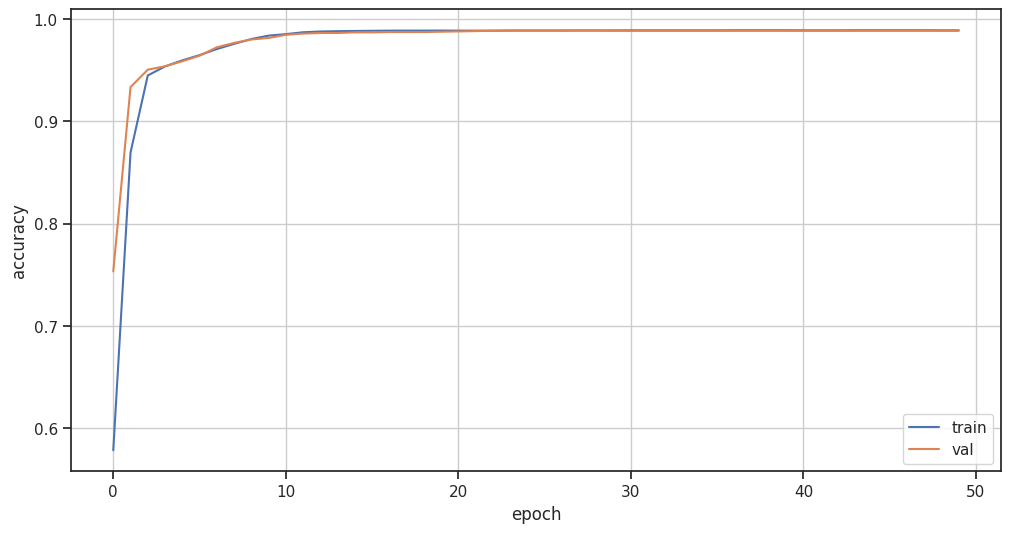

In [22]:
# Grafica precisión de validación y entrenamiento
# Grafica figura
plt.figure(figsize=(12,6))
# Grafica la precisión del conjunto de entrenamiento a lo largo de las épocas
plt.plot(history.history['accuracy'])
# Grafica la precisión del conjunto de validación a lo largo de las épocas
plt.plot(history.history['val_accuracy'])
# Añade una etiqueta al eje x para indicar las épocas
plt.xlabel('epoch')
# Añade una etiqueta al eje y para mostrar la precisión
plt.ylabel('accuracy')
# Añade una leyenda para distinguir entre la precisión de entrenamiento y validación
plt.legend(['train', 'val'])
# Añade una cuadrícula
plt.grid();

Este código genera un gráfico que muestra la precisión del modelo a lo largo de las épocas tanto para el conjunto de entrenamiento como para el conjunto de validación.


Ejes:

Eje x (epochs): Representa el número de épocas del entrenamiento.

Eje y (accuracy): Representa la precisión del modelo.


Curvas:

La línea correspondiente a history.history['accuracy'] muestra la precisión del modelo en los datos de entrenamiento.

La línea correspondiente a history.history['val_accuracy'] muestra la precisión del modelo en los datos de validación.

#### 4j. Visualise the learning curves for analysis purposes (overfitting / underfitting / right fitting)

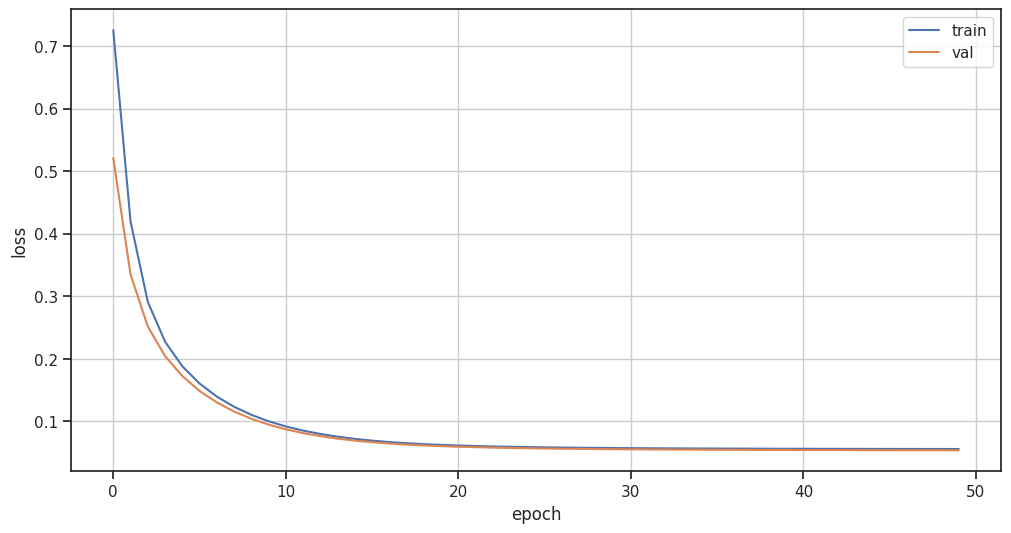

In [23]:
# Grafica pérdida de validación y entrenamiento.
# Grafica figura.
plt.figure(figsize=(12,6))
# Grafica la pérdida del conjunto de entrenamiento a lo largo de las épocas.
plt.plot(history.history['loss'])
# Grafica la pérdida del conjunto de validación a lo largo de las épocas.
plt.plot(history.history['val_loss'])
# Añade una etiqueta al eje x para indicar las épocas.
plt.xlabel('epoch')
# Añade una etiqueta al eje y para mostrar la pérdida.
plt.ylabel('loss')
# Añade una leyenda para distinguir entre la pérdida de entrenamiento y validación.
plt.legend(['train', 'val'])
# Añade cuadrícula.
plt.grid();

Este código genera un gráfico que muestra la pérdida del modelo a lo largo de las épocas tanto para el conjunto de entrenamiento como para el conjunto de validación.

Ejes:

Eje x (epochs): Representa el número de épocas del entrenamiento.

Eje y (loss): Representa el valor de la función de pérdida del modelo.


Curvas:

La línea correspondiente a history.history['loss'] muestra la pérdida del modelo en los datos de entrenamiento.

La línea correspondiente a history.history['val_loss'] muestra la pérdida del modelo en los datos de validación.

In [24]:
# Obtiene los pesos de la primera capa del modelo (InputLayer)
weights = model.layers[0].get_weights()
# Imprime los pesos obtenidos de la capa
print(weights)

[array([[-0.84735   ],
       [ 0.03456732],
       [ 4.5223336 ],
       [ 0.99395907],
       [ 0.3608127 ]], dtype=float32), array([-3.9896634], dtype=float32)]


Despliega el arreglo de los pesos considerando las variables siendo la tercera la que mas afecta positivamente, con un valor de 4.5223 y el sesgo al final con un valor de -3.9896

#### 4k. Evaluate the accuracy of the learnt model using the testing set

In [25]:
# Evalúa el modelo en los datos de prueba (X_test, y_test) y devuelve el valor del loss (pérdida) y la precisión (accuracy)
loss, accuracy = model.evaluate(X_test, y_test)
# Imprime la precisión del modelo en los datos de prueba con 4 decimales
print(f"Test Accuracy: {accuracy:.4f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9896 - loss: 0.0510  
Test Accuracy: 0.9895


El modelo termina con una precisión de 0.9895.

#### 4l. Apply the learnt model to new data (run the next cell multiple times)

In [26]:
# Genera un índice aleatorio dentro del rango del tamaño del conjunto de datos de prueba
indx = np.random.randint(low=0, high=y_test.shape[0])
# Selecciona la fila correspondiente del conjunto de prueba y la convierte en un array 2D
xi = np.array([X_test[indx,:]])
# Realiza una predicción usando el modelo en la entrada xi
prediction = model.predict(xi)
# Imprime la entrada, el objetivo real y la predicción del modelo
print(f"Input: {xi} \t Target: {y_test.iloc[indx]} \t Prediction: {prediction[0][0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Input: [[-0.38804443  0.77562024 -0.62088614 -0.58337719  0.61453816]] 	 Target: 0.0 	 Prediction: 0.0011


Se imprime:

Input: La muestra de entrada que se pasó al modelo.

Target: El valor real de la variable objetivo en y_test para la entrada seleccionada.

Prediction: La probabilidad predicha por el modelo, formateada a cuatro decimales.

### 5. Compute performance metrics

In [27]:
# Importa la función confusion_matrix de scikit-learn para calcular la matriz de confusión
from sklearn.metrics import confusion_matrix

# Se hacen predicciones considerando 1 si la predicción es mayor a 0.5, de lo contrario se considera 0
y_predictions = model.predict(X_test) > 0.5
# Calcula la matriz de confusión comparando las etiquetas verdaderas (y_test) con las predicciones realizadas
c_matrix = confusion_matrix(y_true=y_test, y_pred=y_predictions)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


#### 5a. Compute confusion matrix

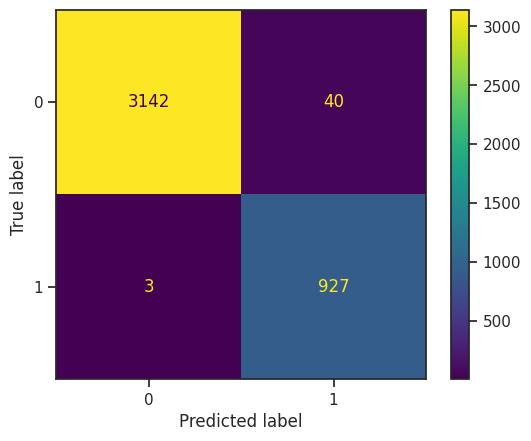

In [28]:
# Crea una instancia de ConfusionMatrixDisplay usando la matriz de confusión calculada (c_matrix)
display_matrix = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
# Plotea la matriz de confusión utilizando el método plot() de la instancia creada
display_matrix.plot()

Se muestra una matriz con la cantidad de predicciones verdaderas negativas, verdaderas positivas, falsas negativas y falsas positivas.

El resultado muestra 3 resultados verdaderos negativos y 40 falsos negativos.

#### 5b. Compute performance metrics

In [29]:
# Define una función que calcula métricas de rendimiento a partir de la matriz de confusión
def get_performance_metrics(c_matrix):
    # Descompone la matriz de confusión en verdaderos negativos (tn), falsos positivos (fp),
    tn, fp, fn, tp = c_matrix[0][0], c_matrix[0][1], c_matrix[1][0], c_matrix[1][1]

    # Calcula la precisión (accuracy) del modelo
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    # Calcula la precisión (precision)
    precision = tp / (tp + fp)
    # Calcula el recall
    recall = tp / (tp + fn)
    # Calcula la especificidad
    specificity = tn / (tn + fp)
    # Calcula la puntuación F1
    f1_score = 2 * (precision * recall)/(precision + recall)
    # Regresa los valores
    return accuracy, precision, recall, specificity, f1_score
# Llama a la función para obtener los valores
accuracy, precision, recall, specificity, f1_score = get_performance_metrics(c_matrix)

# Imprime la variable "Accuracy" a 6 decimales
print(f"Accuracy: {accuracy:0.6f}")
# Imprime la variable "Precision" a 6 decimales
print(f"Precision: {precision:0.6f}")
# Imprime la variable "Recall" a 6 decimales
print(f"Recall: {recall:0.6f}")
# Imprime la variable "Specificity" a 6 decimales
print(f"Specificity: {specificity:0.6f}")
# Imprime la variable "F1-score" a 6 decimales
print(f"F1-score: {f1_score:0.6f}")

Accuracy: 0.989543
Precision: 0.958635
Recall: 0.996774
Specificity: 0.987429
F1-score: 0.977333


Accuracy (0.9895): El modelo tiene una tasa de aciertos del 98.95% en sus predicciones. Esto implica que la mayoría de las predicciones, tanto para las clases positivas (ocupación) como para las negativas (no ocupación), son correctas. Sin embargo, es importante tener en cuenta que el accuracy puede ser engañoso en situaciones donde las clases están desbalanceadas.

Precision (0.9586): De todas las instancias que el modelo clasificó como ocupadas, el 95.86% resultaron ser correctas. Esto muestra que el modelo es muy efectivo en identificar los casos de ocupación, aunque existe el riesgo de algunos falsos positivos (predicciones de ocupación que son incorrectas).

Recall (0.9968): El modelo logra identificar correctamente el 99.68% de los casos que realmente están ocupados. Este alto porcentaje indica que el modelo es muy sensible y eficiente al detectar casos positivos.

Specificity (0.9874): Con una especificidad del 98.74%, el modelo es capaz de identificar correctamente la ausencia de ocupación en la mayoría de los casos. Esto significa que comete muy pocos falsos positivos al predecir que no hay ocupación.

F1-score (0.9773): El F1-score, que combina la precisión y el recall, se sitúa en 97.73%. Este alto valor refleja un buen equilibrio entre ambas métricas, lo que es especialmente relevante en contextos donde hay un desbalance entre las clases, asegurando que el modelo no solo detecte los casos positivos, sino que también minimice los errores.

SECTION C


Vamos a analizar cada métrica y los resultados de ambos modelos:

Accuracy:

Modelo A: 0.9893        Modelo B: 0.989543

La diferencia es mínima, pero el modelo B tiene un valor ligeramente mayor, lo que significa que clasifica correctamente un poco más de muestras en términos generales.


Precision:

Modelo A: 0.9576        Modelo B: 0.958635

El modelo B también tiene una leve ventaja en términos de precisión, lo que indica que comete menos errores al clasificar positivos verdaderos.


Recall:

Modelo A: 0.9968        Modelo B: 0.996774

Ambos modelos tienen valores muy cercanos de recall, lo que indica que ambos son excelentes para detectar positivos verdaderos.


Specificity:

Modelo A: 0.9871        Modelo B: 0.987429

El modelo B tiene un valor ligeramente superior, lo que indica que es un poco mejor detectando negativos verdaderos.


F1-score:

Modelo A: 0.9768        Modelo B: 0.977333

El F1-score del modelo B es ligeramente superior, lo que muestra que tiene un mejor balance entre precisión y recall.


Conclusión:
El modelo B parece tener una ligera ventaja en todas las métricas, aunque las diferencias son pequeñas. Dado que el modelo B utiliza TensorFlow, podría ofrecer ventajas adicionales en términos de escalabilidad, optimización, y facilidad de ajuste en comparación con un modelo hecho desde cero (modelo A). Por lo tanto, elegiría el modelo B como el mejor de los dos, aunque ambos son muy buenos.